In [8]:
import matplotlib.pyplot as plt #v3.1.3
import os
import math
import matplotlib.cm as cm
from matplotlib.pylab import *
import numpy as np #v1.18.1
import pandas as pd #v1.0.1
import seaborn as sns #v0.10.0
import cmocean #v2.0
import netCDF4 as nc #v1.5.3
from netCDF4 import Dataset as NetCDFFile
import cartopy as cp #v0.16.0
import cartopy.crs as ccrs 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io import shapereader
import scipy.stats as ss
import scipy
import gsw
#import seawater.gibbs as gsw
import matplotlib.patches as patches
import requests
import csv
from inspect import cleandoc as dedent
from mpl_toolkits.basemap import Basemap
import pickle as pickle
#matplotlib.use('Qt5Agg')
#import bokeh.plotting, bokeh.models
#bokeh.plotting.output_notebook()
import plotly.express as px
font = {'family' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)

In [9]:
T2_envdata = pd.read_csv('./T2_CCS14_EnvData_forPython.csv')
T2_envdata.set_index('Station')
T2_envdata

,Station,Station_Nr,Temp,Salinity,Oxy_mlL,OxySat_mlL,Fluor_ugL,fvfm,no3_umolkg,po4_umolkg,sio4_umolkg,dfe_nmolkg,N_po4,N_SiO4,N_star
0,T2S1,S1,10.530,33.764,6.834,6.236,20.667,0.617,6.84,0.75,14.14,1.08,9.120000,0.483734,-5.16
1,T2S2,S2,10.208,33.693,6.177,6.275,14.338,0.636,11.35,0.98,14.74,1.04,11.581633,0.770014,-4.33
2,T2S3,S3,10.594,33.772,7.129,6.213,22.509,0.603,13.67,1.24,18.74,1.13,11.024194,0.729456,-6.17
3,T2S4,S4,10.212,33.399,5.472,6.278,2.737,0.540,14.43,1.46,13.86,1.00,9.883562,1.041126,-8.93
4,T2S5,S5,10.755,33.301,5.727,6.211,1.358,0.452,14.48,1.23,11.08,0.58,11.772358,1.306859,-5.20
5,T2S6,S6,10.432,33.378,5.979,6.252,5.060,0.448,13.58,1.13,12.92,0.44,12.017699,1.051084,-4.50
6,T2S7,S7,11.310,33.662,6.400,6.122,7.259,0.455,9.82,1.00,10.64,0.27,9.820000,0.922932,-6.18
7,T2S8,S8,11.305,33.649,6.683,6.128,10.666,0.470,9.85,1.01,10.43,0.47,9.752475,0.944391,-6.31
8,T2S9,S9,10.937,33.349,6.206,6.185,4.734,0.464,12.38,1.07,10.33,0.45,11.570093,1.198451,-4.74
9,T2S10,S10,11.663,33.397,6.257,6.089,2.180,0.444,10.63,1.01,8.60,0.38,10.524752,1.236047,-5.53


In [10]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 7.5]

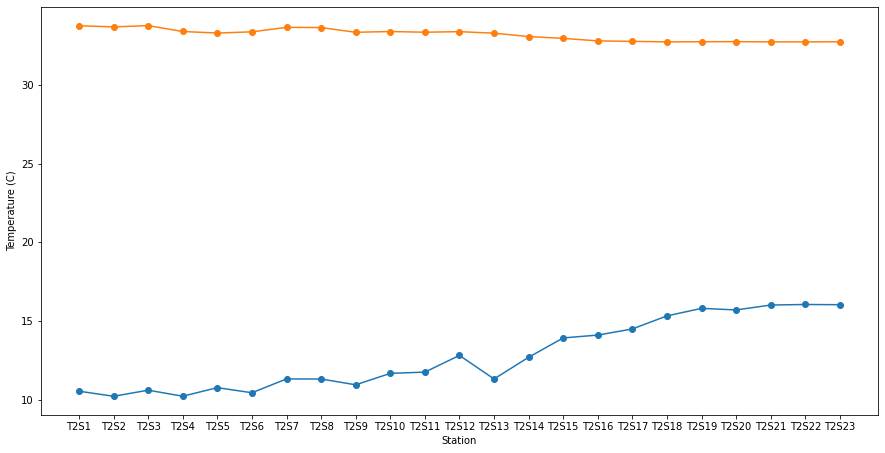

In [4]:
# create figure and axis objects with subplots()
fig,ax=plt.subplots()
ax.plot(T2_envdata.Station, T2_envdata.Temp, marker="o")
ax.set_xlabel("Station")
ax.set_ylabel("Temperature (C)")
ax.plot(T2_envdata.Station, T2_envdata.Salinity, marker="o")
plt.show()


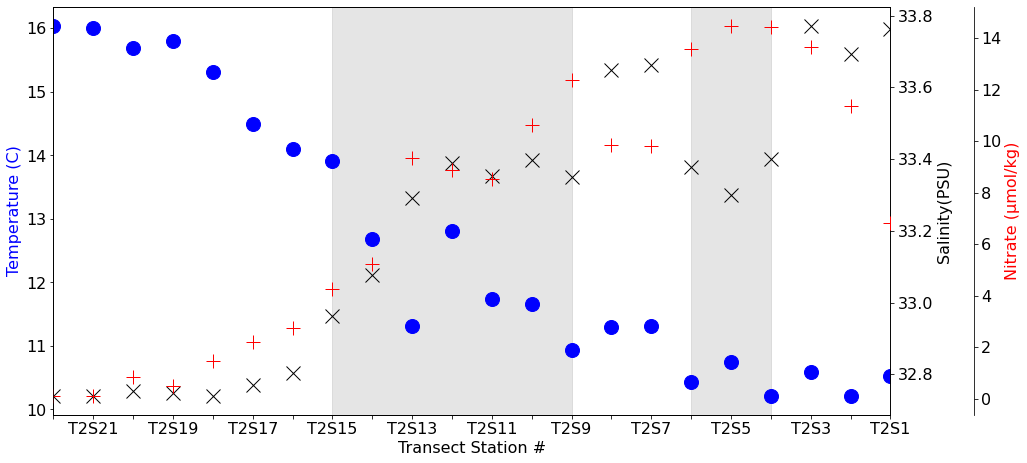

In [13]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(T2_envdata.Station, T2_envdata.Temp,color = "blue",linestyle = 'none', marker="o",markersize = 14)
ax.set_xlabel("Transect Station #",fontsize = 16)
ax.set_ylabel("Temperature (C)",color="blue",fontsize=16)
ax2=ax.twinx()
ax3=ax.twinx()
ax3.spines['right'].set_position(("axes",1.1))


# make a plot with different y-axis using second axis object
ax2.plot(T2_envdata.Station, T2_envdata.Salinity,color="black",linestyle = 'none',marker="x",markersize = 14)
ax2.set_ylabel("Salinity(PSU)",color="black",fontsize=16)
ax2.tick_params(labelsize = 16)
n = 2  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
ax.tick_params(axis='both', labelsize=16)

ax3.plot(T2_envdata.Station,T2_envdata.no3_umolkg,color = "red",linestyle = 'none',marker="+",markersize = 14)
ax3.set_ylabel("Nitrate (\u03bcmol/kg)",color="red",fontsize=16)
ax3.tick_params(labelsize = 16)

xlim((0, 21))
ax.axvspan(3, 5, alpha=0.2, color='gray')
ax.axvspan(8, 14, alpha=0.2, color='gray')
ax.invert_xaxis()
plt.show()
# save the plot as a file
fig.savefig('Sal_Temp_T2.jpg', format='jpeg', dpi=600,bbox_inches='tight')

In [14]:
T9_envdata = pd.read_csv('./T9_CCS14_EnvData_forPython.csv')
T9_envdata.set_index('Station')
T9_envdata

,Station,Staion_Nr,Temp,Salinity,Oxy_mlL,OxySat_mlL,Fluor_ugL,fvfm,no3_umolkg,po4_umolkg,sio4_umolkg,dfe_nmolkg,N_po4,N_SiO4,N_star
0,T9S1,S1,10.381,33.592,5.530,6.251,0.961,0.376,18.55,1.41,18.39,NaN,13.1560283687943,1.00870038064165,-4.01
1,T9S2,S2,10.408,33.608,5.690,6.253,3.043,0.372,19.97,1.49,22.74,0.36,13.4026845637584,0.878188214599824,-3.87
2,T9S3,S3,10.145,33.488,5.632,6.288,2.308,0.392,19.71,1.49,22.49,0.36,13.2281879194631,0.87638950644731,-4.13
3,T9S4,S4,10.398,33.205,5.660,6.277,0.962,0.329,14.56,1.18,16.52,0.40,12.3389830508475,0.88135593220339,-4.32
4,T9S5,S5,11.264,32.384,6.183,6.180,0.733,0.263,2.20,0.50,5.18,0.34,4.4,0.424710424710425,-5.8
5,T9S6,S6,11.943,32.330,6.198,6.076,0.708,0.319,0.57,0.38,3.50,0.27,1.5,0.162857142857143,-5.51
6,T9S7,S7,9.551,32.855,5.391,6.396,0.546,0.375,11.97,1.07,14.29,0.29,11.1869158878505,0.837648705388384,-5.15
7,T9S8,S8,10.894,33.475,5.904,6.173,1.104,0.318,15.50,1.17,16.73,0.31,13.2478632478633,0.926479378362224,-3.22
8,T9S9,S9,11.057,32.964,5.917,6.175,1.271,0.316,14.11,1.06,10.36,0.31,13.311320754717,1.36196911196911,-2.85
9,T9S10,S10,10.997,33.125,6.055,6.163,1.546,0.334,10.23,0.84,6.80,0.26,12.1785714285714,1.50441176470588,-3.21


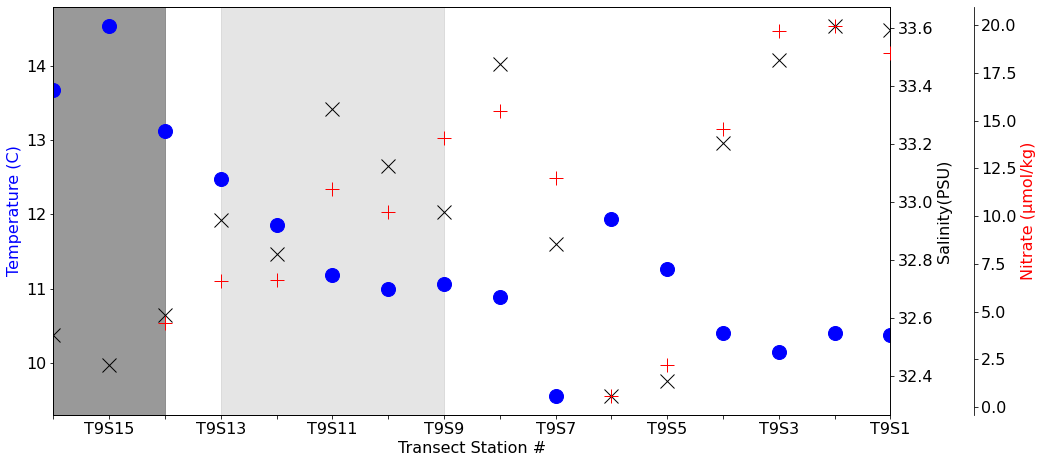

In [15]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
ax.plot(T9_envdata.Station, T9_envdata.Temp,color = "blue",linestyle = 'none', marker="o",markersize = 14)
ax.set_xlabel("Transect Station #",fontsize = 16)
ax.set_ylabel("Temperature (C)",color="blue",fontsize=16)
ax2=ax.twinx()
ax3=ax.twinx()
ax3.spines['right'].set_position(("axes",1.1))


# make a plot with different y-axis using second axis object
ax2.plot(T9_envdata.Station, T9_envdata.Salinity,color="black",linestyle = 'none',marker="x",markersize = 14)
ax2.set_ylabel("Salinity(PSU)",color="black",fontsize=16)
ax2.tick_params(labelsize = 16)
n = 2  # Keeps every 7th label
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % n != 0]
ax.tick_params(axis='both', labelsize=16)

ax3.plot(T9_envdata.Station,T9_envdata.no3_umolkg,color = "red",linestyle = 'none',marker="+",markersize = 14)
ax3.set_ylabel("Nitrate (\u03bcmol/kg)",color="red",fontsize=16)
ax3.tick_params(labelsize = 16)

xlim((0, 15))
#ax.axvspan(-1, 2, alpha=0.2, color='gray')
ax.axvspan(8, 12, alpha=0.2, color='gray')
ax.axvspan(13, 15, alpha=0.8, color='gray')
ax2.invert_xaxis()
plt.show()
# save the plot as a file
fig.savefig('Sal_Temp_T9.jpg', format='jpeg', dpi=600,bbox_inches='tight')

<ipython-input-12-b274b287a212>:33: UserWarning: The following kwargs were not used by contour: 'manual'
  CS = plt.contour(si,ti,dens, linestyles='dashed',levels = [23.5,24,24.5,25,25.5,26],manual = 'True', colors='k')
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


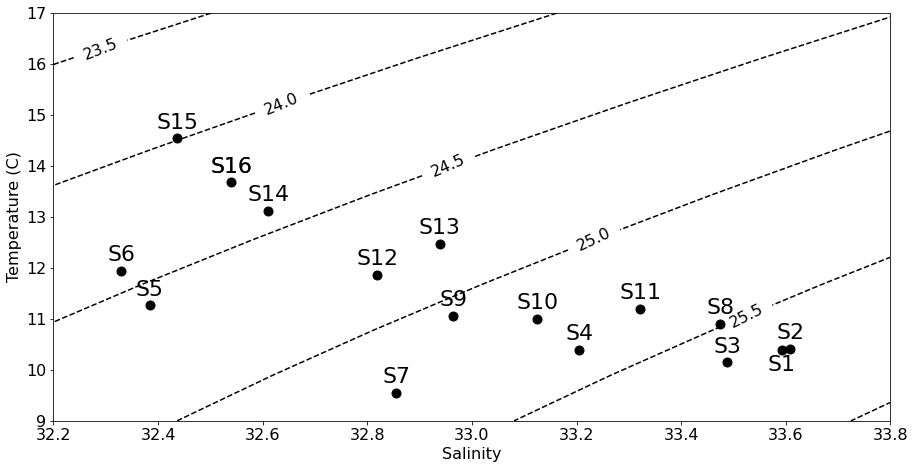

In [12]:
# Create variables with user-friendly names
temp  = T9_envdata.Temp
salt  = T9_envdata.Salinity
 
# Figure out boudaries (mins and maxs)
smin = 32
smax = 34
tmin = 8
tmax = 17
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))

# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)
 
# Substract 1000 to convert to sigma-t
dens = dens - 1000
 
# Plot data ***********************************************
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
CS = plt.contour(si,ti,dens, linestyles='dashed',levels = [23.5,24,24.5,25,25.5,26],manual = 'True', colors='k')
plt.clabel(CS, fontsize=16, inline=1, fmt='%.1f') # Label every second level
 
ax1.plot(salt,temp,'ok',markersize=9)
num = 0
for x,y in zip(salt,temp):

    label = T9_envdata.Staion_Nr[num]
    if num == 0:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    else:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
    num = num+1
ax1.tick_params(axis='both', labelsize=16)
plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
ax1.set_xlim([32.2, 33.8])
ax1.set_ylim([9,17])
ax1.set_xlabel('Salinity',fontsize = 16)
ax1.set_ylabel('Temperature (C)',fontsize = 16)
fig1.savefig('T_S_T9.jpg', format='jpeg', dpi=600,bbox_inches='tight')

<ipython-input-16-8fc50c2e19b5>:33: UserWarning: The following kwargs were not used by contour: 'manual'
  CS = plt.contour(si,ti,dens, linestyles='dashed',levels = [23.5,24,24.5,25,25.5,26],manual = 'True', colors='k')


18
19
20
21
22


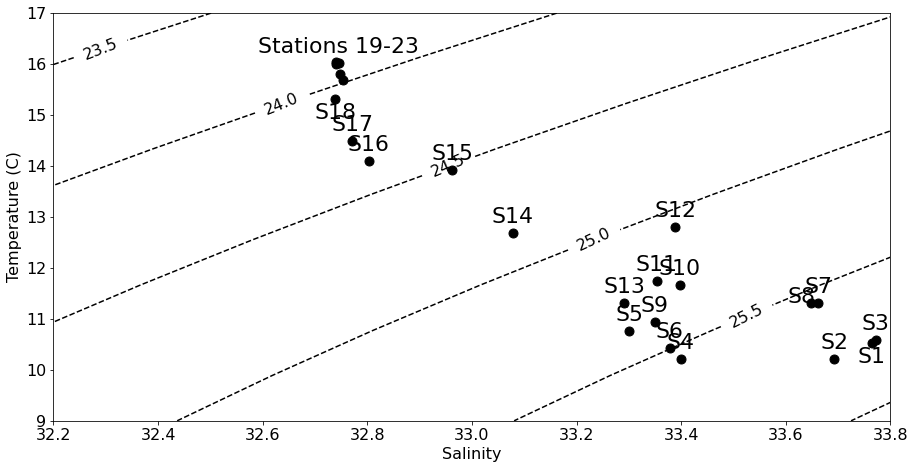

In [16]:
# Create variables with user-friendly names
temp  = T2_envdata.Temp
salt  = T2_envdata.Salinity
 
# Figure out boudaries (mins and maxs)
smin = 32
smax = 34
tmin = 8
tmax = 17
 
# Calculate how many gridcells we need in the x and y dimensions
xdim = int(round((smax-smin)/0.1+1,0))
ydim = int(round((tmax-tmin)+1,0))

# Create empty grid of zeros
dens = np.zeros((ydim,xdim))
 
# Create temp and salt vectors of appropiate dimensions
ti = np.linspace(1,ydim-1,ydim)+tmin
si = np.linspace(1,xdim-1,xdim)*0.1+smin
 
# Loop to fill in grid with densities
for j in range(0,int(ydim)):
    for i in range(0, int(xdim)):
        dens[j,i]=gsw.rho(si[i],ti[j],0)
 
# Substract 1000 to convert to sigma-t
dens = dens - 1000
 
# Plot data ***********************************************
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
CS = plt.contour(si,ti,dens, linestyles='dashed',levels = [23.5,24,24.5,25,25.5,26],manual = 'True', colors='k')
plt.clabel(CS, fontsize=16, inline=1, fmt='%.1f') # Label every second level
 
ax1.plot(salt,temp,'ok',markersize=9)
num = 0
for x,y in zip(salt,temp):

    label = T2_envdata.Station_Nr[num]
    if num == 0:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    elif num == 7:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(-10,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    elif num == 17:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-20), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    elif num in range(18, 23,1):
        print(num)
    else:
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
    num = num+1
label = 'Stations 19-23'
plt.annotate(label, # this is the text
                 (salt[22],temp[22]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
ax1.set_xlim([32.2, 33.8])
ax1.set_ylim([9,17])
ax1.tick_params(axis='both', labelsize=16)
ax1.set_xlabel('Salinity',fontsize = 16)
ax1.set_ylabel('Temperature (C)',fontsize = 16)
fig1.savefig('T_S_T2.jpg', format='jpeg', dpi=600,bbox_inches='tight')

In [68]:
ASV_FrontalComp = pd.read_csv('../SequenceAnalysis/NewAnalysis_June2021/Results_T2T9_ASV_KruskalWallis.csv')
ASV_FrontalComp = ASV_FrontalComp.drop("ASV_NR_main", axis=1)
ASV_FrontalComp

,T2S1,T2S10,T2S2,T2S3,T2S4,T2S5,T2S6,T2S7,T2S8,T2S9,T2S11,T9S9,T9S10,T9S11,T9S12,T9S13,T9S16
0,20531,40872,31065,57951,74279,42206,56468,61024,13463,46406,63241,6125,33679,16587,27186,40239,53591
1,2219,3343,5008,1549,18178,13478,12244,2015,7254,14162,4571,3461,9443,14457,5874,7435,4387
2,1815,3218,3353,749,7620,5573,4733,1516,6240,6742,1716,2720,7006,5579,5418,6348,2416
3,588,2765,2862,481,8149,12760,5672,372,3496,6423,6548,3055,8803,2762,1225,665,546
4,82,90,184,45,383,276,195,50,485,262,67,41,57,69,207,205,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
893,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [69]:

ASV_FrontalComp = ASV_FrontalComp.transform(np.sqrt)
ASV_FrontalComp

,T2S1,T2S10,T2S2,T2S3,T2S4,T2S5,T2S6,T2S7,T2S8,T2S9,T2S11,T9S9,T9S10,T9S11,T9S12,T9S13,T9S16
0,143.286426,202.168247,176.252660,240.730139,272.541740,205.440989,237.629964,247.030363,116.030168,215.420519,251.477633,78.262379,183.518391,128.790528,164.881776,200.596610,231.497300
1,47.106263,57.818682,70.767224,39.357337,134.825814,116.094789,110.652610,44.888751,85.170417,119.004202,67.609171,58.830264,97.175100,120.237265,76.642025,86.226446,66.234432
2,42.602817,56.727418,57.905095,27.367864,87.292611,74.652528,68.796802,38.935845,78.993671,82.109683,41.424630,52.153619,83.701852,74.692704,73.607065,79.674337,49.152823
3,24.248711,52.583267,53.497664,21.931712,90.271812,112.960170,75.312682,19.287302,59.126982,80.143621,80.919713,55.272054,93.824304,52.554733,35.000000,25.787594,23.366643
4,9.055385,9.486833,13.564660,6.708204,19.570386,16.613248,13.964240,7.071068,22.022716,16.186414,8.185353,6.403124,7.549834,8.306624,14.387495,14.317821,12.884099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
893,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
A = ASV_FrontalComp[["T2S1","T2S10","T2S2","T2S3","T2S4","T2S5","T2S6","T2S7","T2S8","T2S9","T2S11"]]
A

,T2S1,T2S10,T2S2,T2S3,T2S4,T2S5,T2S6,T2S7,T2S8,T2S9,T2S11
0,143.286426,202.168247,176.252660,240.730139,272.541740,205.440989,237.629964,247.030363,116.030168,215.420519,251.477633
1,47.106263,57.818682,70.767224,39.357337,134.825814,116.094789,110.652610,44.888751,85.170417,119.004202,67.609171
2,42.602817,56.727418,57.905095,27.367864,87.292611,74.652528,68.796802,38.935845,78.993671,82.109683,41.424630
3,24.248711,52.583267,53.497664,21.931712,90.271812,112.960170,75.312682,19.287302,59.126982,80.143621,80.919713
4,9.055385,9.486833,13.564660,6.708204,19.570386,16.613248,13.964240,7.071068,22.022716,16.186414,8.185353
...,...,...,...,...,...,...,...,...,...,...,...
890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
891,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
893,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [90]:
B = ASV_FrontalComp[["T9S9","T9S10","T9S11","T9S12","T9S13","T9S16"]]
stats.f_oneway(A.to_numpy(),B.to_numpy())

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 11 and the array at index 1 has size 6

In [26]:
from scipy import stats

stats.ttest_ind(A.T2S1,A.T2S2)

Ttest_indResult(statistic=0.2504205634043659, pvalue=0.8022908993783966)

In [77]:
from itertools import combinations
A_np = A.to_numpy()
def ttest_run(c1, c2):
    results = stats.ttest_ind(ASV_FrontalComp[[c1]], ASV_FrontalComp[[c2]])
    df = pd.DataFrame({'categ1': c1,
                       'categ2': c2,
                       'tstat': results.statistic,
                       'pvalue': results.pvalue}, 
                       index = [0])    
    return df

df_list = [ttest_run(i,j) for i,j in combinations(ASV_FrontalComp.columns.tolist(),2)]

In [86]:
df_list

[  categ1 categ2     tstat   pvalue
 0   T2S1  T2S10 -0.560498  0.57521,
   categ1 categ2     tstat    pvalue
 0   T2S1   T2S2 -0.211396  0.832602,
   categ1 categ2     tstat    pvalue
 0   T2S1   T2S3  0.740315  0.459206,
   categ1 categ2     tstat    pvalue
 0   T2S1   T2S4 -0.791607  0.428695,
   categ1 categ2     tstat    pvalue
 0   T2S1   T2S5 -0.728012  0.466701,
   categ1 categ2     tstat    pvalue
 0   T2S1   T2S6 -0.473259  0.636086,
   categ1 categ2     tstat    pvalue
 0   T2S1   T2S7  0.195411  0.845094,
   categ1 categ2     tstat    pvalue
 0   T2S1   T2S8 -1.591279  0.111724,
   categ1 categ2   tstat    pvalue
 0   T2S1   T2S9 -2.0516  0.040354,
   categ1 categ2     tstat    pvalue
 0   T2S1  T2S11 -0.250791  0.802004,
   categ1 categ2     tstat    pvalue
 0   T2S1   T9S9  0.376972  0.706239,
   categ1 categ2     tstat    pvalue
 0   T2S1  T9S10 -1.581744  0.113885,
   categ1 categ2     tstat    pvalue
 0   T2S1  T9S11 -1.174351  0.240411,
   categ1 categ2     tstat    p